# ML Algorithm ที่สำคัญ

ในการทำ ML เราจะต้องเป็นผู้กำหนดหรือเลือกว่าจะให้เครื่องใช้หลักหรือเทคนิคอะไรในการรับรู้ข้อมูลแล้วสามารถคิดประมวลผลได้

เทคนิคที่ใช้ในการประมวลผล ก็คือวิธีการทางคณิตศาสตร์ หรือเรียกว่า อัลกอริทึม(Algorithm) 

In [1]:
#ข้อมูลลูกค้า มีค่าที่สำคัญดังนี้

#y คือ Class หรือ Label ของข้อมูล ซึ่งก็คือผลของการทำนายที่ต้องการ เช่น yes/no หรือ 0/1 (ในที่นี้คือ yes=อนุมัติ, no=ไม่อนุมัติ)
#X คือ Features/arributes คือค่าคุณลักษณะของข้อมูล เช่น age, employed, own_house, credit

#P(y=yes|X employed=True) หมายถึง ความน่าจะเป็นของสถานะอนุมัติการปล่อยเงินกู้เป็น yes เมื่อสถานะการมีงานทำ = True 
#พูดแบบง่าย ๆ ถ้ามีงานทำ ความน่าจะเป็นของการปล่อยอนุมัติเงินกู้จะเป็นอย่างไร

In [2]:
#ตัวอย่างข้อมูล y
#y = 'yes'
#y = 'no'

#ตัวอย่าง Features (ลำดับคือ ช่วงอายุ สถานะการมีงานทำ มีบ้าน เครดิต)
#X = ['old','True','False','good']     
#Y = ['young','True','False','good']

In [4]:
#ยิ่งมีตัวแปรใน Features เยอะ กรณีคิดความน่าจะเป็นก็เยอะตามไปด้วย
#แต่ในที่นี้จะยกตัวอย่าง ความน่าจะเป็นของการมีงานแล้วได้อนุมัติเงินกู้ (target=yes)

#จากสมการที่กล่าวไปข้างบน เขียนเป็นสมการความน่าจะเป็นของการมีงานแล้วได้อนุมัติเงินกู้ ดังนี้

#P(y=yes|X employed=True) = P(X employed=True|y=yes)*P(y=yes)/P(X employed=True)

import pandas as pd
import numpy as np
df = pd.read_csv('data/simple_loan.csv')
df.head()

,age,employed,own_house,credit,target
0,young,False,n,fair,no
1,young,False,n,good,no
2,young,True,n,good,yes
3,young,True,y,fair,yes
4,young,False,n,fair,no


In [6]:
#ทำ PivotTable สวรุปสถานะการมีงานทำ(employed) และ Class ของผลลัพธ์(target)
pd.pivot_table(index='employed', columns=['target'], values=['age'], data=df, aggfunc='count', fill_value=0, margins=True)

age        
target    no yes All
employed            
False      6   5  11
True       0   6   6
All        6  11  17

In [7]:
#คำนวณหาค่าต่าง ๆ เพื่อนำไปเข้าสูตร
#P(y=yes) ความน่าจะเป็นของ y=yes คิดจากสัดส่วนจำนวน target = yes หารด้วยจำนวนข้อมูลทั้งหมด 
#yes 11 ตัว มีข้อมูลทั้งหมด 17 ตัว ; 11/17 = 0.647

#P(X employed=True) ความน่าจะเป็นของการมีงานทำ
#employed=True มี 6 ข้อมูลทั้งหมดมี 17 ; 6/17 = 0.353

#P(X employed=True|y=yes)
#นำค่าสองตัวข้างบนมาหาร จะได้ 6/11 = 0.545

#ทำการคูณทั้งหมด ในสมการ P(y=yes | X employed=True)
#; 0.545*0.647/0.353 = 0.999

#ความหมายคือ คนที่มีงานทำมีโอกาสได้อนุมัติปล่อยกู้สูงถึง 0.999!

In [9]:
#ความน่าจะเป็นของการมีงาน แล้วไม่ปล่อยกู้ (target=no)

#P(y=no|X employed=true) = P(X employed=True|y=no) * P(y=no)/P(X employed=True)

#P(y=no) ก็คือ target=no (มี 6 ตัว) หารด้วยข้อมูลทั้งหมด ; 6/17 = 0.353
#P(X= employed=true) ; 6/17 = 0.353
#P(X employed=True|y=no) ความน่าจะเป็นที่ y=no และ employed=True ; 0/6 = = 0
#คูณทั้งหมดในสมการ P(y=no|X employed=true) ; 0* 0.353/0.353 = 0

#ความหมายคือ คนที่มีงานทำมีโอกาสไม่ได้อนุมัติปล่อยสินเชื่อเงินกู้ 0 (แทบไม่มีโอกาสเกิดขึ้น!)

In [10]:
#จากทั้งสองกรณี (loan = yes และ loan = no) จะเห็นว่า P(yes) สูงกว่า ดังนั้นสรุปได้ ถ้ามีงานทำ ระบบก็จะแนะนำ(ทำนาย) ให้ปล่อยกู้ได้

#นี่เป็นตัวอย่างหลักการคำนวณของอัลกอริทึม โดยยกตัวอย่างการคำนวณ Feature เพียงตัวแปรเดียวคือ employed เท่านั้น
#ซึ่งในงานจริง Feature จะมีตัวแปรหลายตัว ก็ต้องคำนวณความน่าจะเป็นให้ครบทุกกรณี ซึ่งถ้าคำนวณด้วยมือมันจะยุ่งยากและเสียเวลา
#ต่อไปจะใช้ scikit-learn ในการสร้าง Naive Bayes Classifier

In [11]:
#เตรียม X, y เพื่อ Train

feature_columns = ['age','employed','own_house','credit']
X = df[feature_columns]
y = df.target

In [12]:
#เข้ารหัส(Label encoding)

def labelEncode(data, columns):
    for i in columns:
        data[i + '_'], _ = pd.factorize(data[i], sort=True)

feature_columns = ['age', 'employed', 'own_house', 'credit']
labelEncode(df, feature_columns)

df['target_'], class_names = pd.factorize(df.target)
enc_columns = ['age_','employed_','own_house_','credit_']
X = df[enc_columns]
y = df.target_ 

In [13]:
df.sample(5)

,age,employed,own_house,credit,target,age_,employed_,own_house_,credit_,target_
13,old,True,n,excellent,yes,1,1,0,0,1
3,young,True,y,fair,yes,2,1,1,1,1
1,young,False,n,good,no,2,0,0,2,0
4,young,False,n,fair,no,2,0,0,1,0
16,young,True,y,fair,yes,2,1,1,1,1


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [15]:
X_train.shape , X_test.shape

((11, 4), (6, 4))

In [16]:
y_train.shape , y_test.shape

((11,), (6,))

In [17]:
#สร้าง Model ด้วย algorithm Naive Bayes

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()        #Naive Bayes
model.fit(X_train, y_train)

GaussianNB()

In [19]:
model.score(X_test, y_test)   #ทดสอบประเมินประสิทธิภาพด้วยตัว Test 
#ค่าจะแตกต่างกันในการรันแต่ละครั้ง

1.0

In [20]:
#ทำนาย เมื่อมีลูกค้ารายใหม่
X_input = [[0,1,1,1], [1,0,0,2], [1,1,0,1], [2,0,1,1]]    #Input สำหรับการวิเคราห์ทำนาย
y_predict = model.predict(X_input)                        #ทำนาย
print(y_predict)                                          #ผลลัพธ์

[1 0 1 1]


In [22]:
#ฟังก์ชันปรินท์ผลลัพธ์ แล้วแปลงออกมาเป็นอักษร
for i in y_predict:
    print('Result : {}'. format(class_names[i]))

Result : yes
Result : no
Result : yes
Result : yes


In [23]:
#ประเมินแบบ Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

cvs = cross_val_score(model, X, y, cv=5)  
print('cross val scores {}'.format(cvs))
print('mean {:4f}' .format(cvs.mean()))

cross val scores [1.         1.         1.         1.         0.66666667]
mean 0.933333


In [24]:
#ค่าเฉลี่ยความแม่นยำ = 0.933
#เมื่อเปรียบเทียบกับ Workshop5 ของบท ModelEvaluation ที่ค่าเฉลี่ย = 0.8667 
#แสดงว่าใช้ Naive Bayes มีประสิทธิภาพกว่า

In [25]:
#Workshop Iris

import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


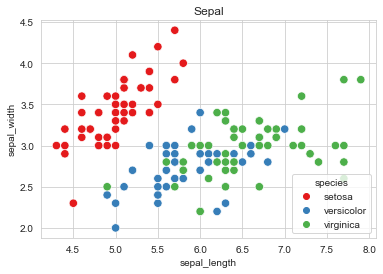

In [28]:
sns.set_style('whitegrid')
sns.scatterplot('sepal_length','sepal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Sepal')
plt.show()

In [29]:
#จะพบว่ากลุ่มจุดข้อมูลขนาดกลีบ Sepal ของ Setosa แยกจาก Versicolor และ Virginica อย่างชัดเจน เพราะขนาดของกลีบ Sepal เล็กกว่า
#ส่วน Versicolor และ Virginica มีเหลื่อมกันอยู่เนื่องจาก กลีบ Sepal ขนาดใกล้เคียงกัน 

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


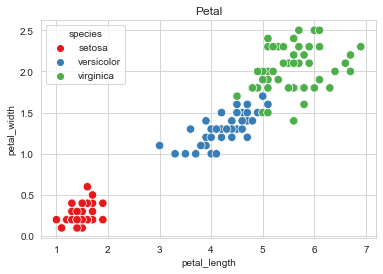

In [30]:
sns.scatterplot('petal_length','petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('Petal')
plt.show()

In [31]:
#พบว่า ทั้ง 3 สายพันธ์มีจุดเหลื่อมทับกันเล็กน้อย(โดยเฉพาะ versicolor กับ virginica)
#แต่โดยรวมถือว่ามีการแยกชัดเจนระหว่างสายพันธุ์

#หากจะสร้างระบบ ML คัดแยกสายพันธุ์ ควรใช้ข้อมูล petal_length กับ petal_width จะดีกว่า sepal_length+sepal_width เพราะเหลื่อมทับน้อยกว่า ความแม่นยำจะมากกว่า

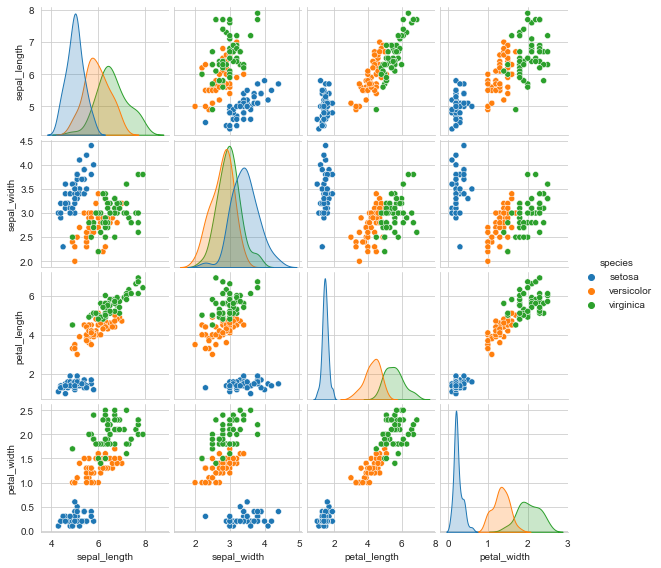

In [32]:
#ทั่วไปเรามักจะดูความสัมพันธ์ของ features แต่ละคู่ว่าสัมพันธ์กันอย่างไร จะสามารถนำมาเป็นเกณฑ์จำแนกได้หรือไม่ คู่ใดจะคัดแยกได้ดีที่สุด
#หาก dataset มี features หลายตัว พล็อตทีละคู่จะเสียเวลา สามารถพล็อตทุกคู่ได้ในคำสั่งเดียวคือ pairplot

sns.pairplot(df, hue='species', height=2.0)
plt.show()

In [33]:
#กราฟเส้นโค้ง(ที่เหมือนภูเขา) แสดงการแจกแจงความถี่ของกลุ่มข้อมูลแต่ละสายพันธุ์
#ยอดภูเขาจะเป็นค่าเฉลี่ยของกลุ่มข้อมูล ส่วนฐานภูเขาแสดงการกระจายของข้อมูล (หลักการคล้าย ๆ Histogram หรือ Normal dist.)

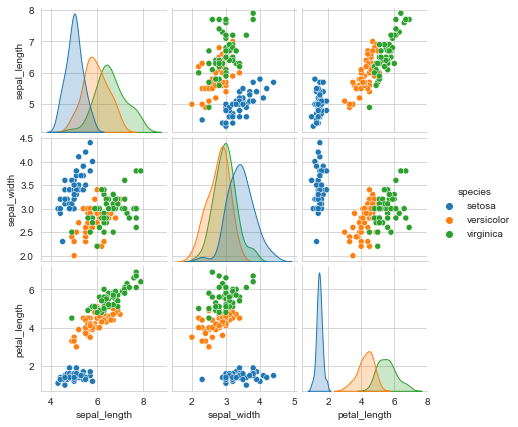

In [35]:
#ในกรณีที่ Features มีจำนวนมาก ๆ ถ้าใช้ pairplot จะเสียเวลาเพราะประมวลผลช้า สามารถเลือกเฉพาะคอลัมน์ที่สนใจได้

columns = ['sepal_length','sepal_width','petal_length','species']
sns.pairplot(df[columns], hue='species', height=2.0)
plt.show()

In [36]:
#เตรียมข้อมูล Features และ Label เพื่อใช้ในการ Train และ Test

X = df.drop('species', axis=1)  #ตัดส่วนที่เป็น species ออกไป 

feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']   #เอาเฉพาะคอลัมน์ที่ต้องการ
X = df[feature_cols]
X.head()  

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
y = df.species
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [38]:
X.shape

(150, 4)

In [39]:
y.shape

(150,)

In [40]:
#Naive Cross Validation (k-10 cross validation)

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

cvs = cross_val_score(model, X, y, cv=10)  # ไม่ต้องใช้ model.fit      #cv = ค่า k(k=10 แบ่ง10ส่วน)
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [0.933 0.933 1.    0.933 0.933 0.933 0.867 1.    1.    1.   ]
mean (%) = 95.333


In [41]:
#ได้ค่าความแม่นยำ 10 ค่า แล้วหาค่าเฉลี่ย ได้ = 95.33%

In [42]:
#สร้าง Model และประเมินทดสอบ โดยทำการ Train และ test

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3) 

In [43]:
import numpy as np
(label, count) = np.unique(y_test , return_counts=True)
freq = np.asarray((label, count)).T
print(freq) #จำนวน y_test ที่แบ่งไปทดสอบ

[['setosa' 11]
 ['versicolor' 17]
 ['virginica' 17]]


In [44]:
#Train & test

model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm) 

Accuracy Score: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.88      0.91        17
   virginica       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[11  0  0]
 [ 0 15  2]
 [ 0  1 16]]


In [45]:
#11 15 16 คือจำนวนทีทำนายถูก
#1 คือจำนวนที่ทำนายผิด 

y_test[(y_test == y_pred)].count()   #นับจำนวนที่ทำนายถูกต้อง

42

In [46]:
#ดูว่าดอกไม้ใดที่ Model ทำนายผิด

import pandas as pd
dy = pd.DataFrame()
dy['y_test'] = y_test
dy['y_pred'] = y_pred
dy['result'] = y_test == y_pred

dy[dy.result == False] 

,y_test,y_pred,result
77,versicolor,virginica,False
70,versicolor,virginica,False
106,virginica,versicolor,False


In [47]:
#ทำนายสายพันธุ์ดอกไม้

#สร้าง X_input ให้มีค่าตามขนาดดอกไม้ เช่น

import numpy as np

X_input = np.array([[4.7,3.6,2.0,0.8],
                    [6.5,2.5,4.8,1.4]
                   ])
X_input

array([[4.7, 3.6, 2. , 0.8],
       [6.5, 2.5, 4.8, 1.4]])

In [48]:
#นำ Input เข้าไปทำนายการ Train ใหม่
print(model.predict(X_input))

['setosa' 'versicolor']


In [49]:
#เนื่องจาก Naive Bayes ใช้ค่าความน่าจะเป็นในการทำนาย ดังนั้นดูความน่าจะเป็นของการทำนายได้ดังนี้
print(y.unique())
print(model.predict_proba(X_input).round(8))

['setosa' 'versicolor' 'virginica']
[[0.98922959 0.01077041 0.        ]
 [0.         0.98040897 0.01959103]]


In [50]:
#ดอกไม้ดอกแรก ช่อง setosa มีค่า 0.989 ส่วน versicolor 0.010 ความหมายคือมีความน่าจะเป็นสูงถึง 98.9% ที่เป็น Setosa (โคตรมั่น!)
#ดอกไม้ที่ 2    ช่อง versicolor มีค่า 0.98 ส่วน virginica มีค่า 0.019 คือ มีความน่าจะเป็นสูงถึง 98% ที่จะเป็น versicolor มากกว่า verginica

In [51]:
#ดูข้อมูลใหม่(New Input Data)อยู่ตรงไหน?

#หาค่าขนาดกลีบ sepal_length และ sepal_width ของทั้งสองข้อมูล
xsp = X_input[:,:1].reshape(1, -1)[0]      #x sepal_length (ความกว้างกลีบ)
ysp = X_input[:,1:2].reshape(1, -1)[0]     #y sepal_width (ความยาวกลีบ)
xsp, ysp 

(array([4.7, 6.5]), array([3.6, 2.5]))

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


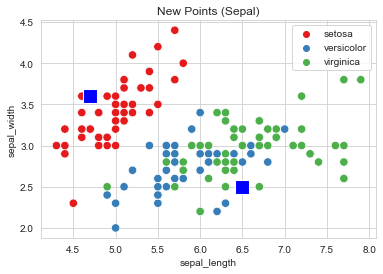

In [52]:
#พล็อตดอกใหม่ 2 ดอก ในระนาบ sepal

sns.scatterplot('sepal_length','sepal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('New Points (Sepal)')
sns.scatterplot(xsp, ysp, marker='s', color='blue', s=180) #ดอกใหม่เป็นสี่เหลี่ยม
plt.show()

In [53]:
#พล็อตดอกใหม่ 2 ดอก ในระนาบ petal

xpe = X_input[:,2:3].reshape(1,-1)[0]   #petal_length
ype = X_input[:,3:4].reshape(1,-1)[0]   #petal_width
xpe, ype

(array([2. , 4.8]), array([0.8, 1.4]))

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


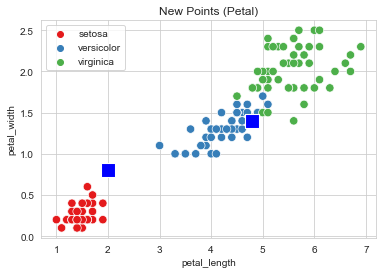

In [54]:
sns.scatterplot('petal_length','petal_width',data=df, hue='species',palette='Set1', s=70)
plt.title('New Points (Petal)')
sns.scatterplot(xpe, ype, marker='s', color='blue', s=180)
plt.show()

In [55]:
#จำแนกดอกไม้ด้วย SVM 

#ใช้ X, y ของ workshop ก่อนหน้า
#10-fold Cross Validation

from sklearn.svm import SVC

model = SVC(kernel='linear') 

cvs = cross_val_score(model, X, y, cv=10) 
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 ))

cross val scores [1.    0.933 1.    1.    0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 97.333


In [56]:
#ค่าเฉลี่ยความแม่นยำ = 97.33% ซึ่งสูงกว่า Naive Bayes เล็กน้อย

In [57]:
#Train แล้วทำนายดอกไม้ 2 ดอกจาก Workshop ที่แล้ว (X_input)
model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


In [58]:
model = SVC(kernel = 'linear', probability=True)   #ต้องการค่า probability ให้กำหนดดังนี้

In [59]:
#กำหนดตัวเลือก kernel เช่น
#model = SVC(kernel='poly', degree=3, gamma='auto')   #polynomial
#model = SVC(gamma='auto')   #rbf (default)

In [60]:
#จำแนกดอกไม้ด้วย kNN 

#ใช้ X, y ของ workshop ก่อนหน้า
#10-fold Cross Validation

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3) 

cvs = cross_val_score(model, X, y, cv=10)               #ไม่ต้อง model.fit
print('cross val scores {}'.format(cvs.round(3)))
print('mean (%) = {:.3f}' .format(cvs.mean() * 100 )) 

cross val scores [1.    0.933 1.    0.933 0.867 1.    0.933 1.    1.    1.   ]
mean (%) = 96.667


In [61]:
#ค่าความแม่นยำ = 96.667%

In [63]:
#kNN สามารถปรับค่าของ Model โดยการกำหนดค่า n_neighbors(จำนวนจุดใกล้เคียง หรือจำนวนเพื่อนบ้าน)
#เช่น
model = KNeighborsClassifier(n_neighbors=1)

In [65]:
model.fit(X, y)
print(model.predict(X_input))

['setosa' 'versicolor']


In [66]:
#จำแนกสายพันธุ์ด้วย Random Forest

len(X_train)

105

In [67]:
import scikitplot as skplot
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=80)        #estimators คือ จำนวนต้นไม้ที่ต้องการสร้าง
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [68]:
class_names = df.species.unique()  #รายชื่อ Class/Target จะใช้ตอนรายงานผล
class_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Score -> 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.88      0.91        17
   virginica       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[11  0  0]
 [ 0 15  2]
 [ 0  1 16]]


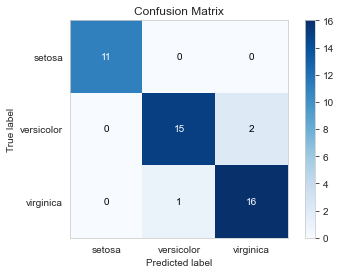

In [69]:
y_predict = model.predict(X_test)

print('Score -> {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

skplot.metrics.plot_confusion_matrix(y_test, y_predict)
plt.show() 

In [70]:
#ได้ความแม่นยำ 93.33% (แต่ละคนจะได้ต่างกัน เพราะ Train-test split มาจากการสุ่ม)

Score: 0.9333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.94      0.88      0.91        17
   virginica       0.89      0.94      0.91        17

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[11  0  0]
 [ 0 15  2]
 [ 0  1 16]]


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

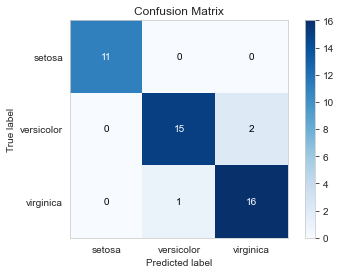

In [71]:
#ลองใช้ Decision Tree โดยใช้ Train-test ชุดเดียวกัน

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


print('Score: {:.4f}' . format(model.score(X_test, y_test)))
print(classification_report(y_test, y_predict, target_names=class_names))
print(confusion_matrix(y_test, y_predict))

skplot.metrics.plot_confusion_matrix(y_test, y_predict, normalize=False)

In [72]:
#ค่าความแม่นยำ 93.33% (ค่าอาจต่างจากนี้ได้ เนื่องจากการสุ่ม) 

#บางทีทดลองแล้วค่าความแม่นยำไม่ต่างกันใน 2 อัลกอริทึม เพราะความซับซ้อนของข้อมูลไม่มาก แนะนำให้ทดลองกับข้อมูลมะเร็ง(cancer) ในบทที่ 21

In [73]:
#จัดกลุ่มดอกไม้ด้วย k-Means
print(y.unique())

['setosa' 'versicolor' 'virginica']


In [77]:
#ข้อมูล X ใช้ของ workshop ก่อนหน้า
#y ไม่ต้องใช้ เพราะเป็น Unsupervised ML

from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)        #สร้าง Model กำหนดให้แบ่ง 3 กลุ่ม (โดยไม่ต้องใช้ y)
y_kmeans = model.fit_predict(X)     #สร้างกลุ่ม (Clustering)

In [78]:
df['cluster'] = y_kmeans            #Label บอกว่าข้อมูลอยู่ในกลุ่มใด
df.sample(8)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
119,6.0,2.2,5.0,1.5,virginica,2
48,5.3,3.7,1.5,0.2,setosa,1
63,6.1,2.9,4.7,1.4,versicolor,2
93,5.0,2.3,3.3,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
12,4.8,3.0,1.4,0.1,setosa,1
107,7.3,2.9,6.3,1.8,virginica,0
138,6.0,3.0,4.8,1.8,virginica,2


In [79]:
df[df.cluster==0].head()             #ทำลิสดูกลุ่ม cluster = 0

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
52,6.9,3.1,4.9,1.5,versicolor,0
77,6.7,3.0,5.0,1.7,versicolor,0
100,6.3,3.3,6.0,2.5,virginica,0
102,7.1,3.0,5.9,2.1,virginica,0
103,6.3,2.9,5.6,1.8,virginica,0


In [80]:
df[df.cluster==1].head()      

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [81]:
df[df.cluster==2].head()      

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
53,5.5,2.3,4.0,1.3,versicolor,2
54,6.5,2.8,4.6,1.5,versicolor,2
55,5.7,2.8,4.5,1.3,versicolor,2


In [82]:
#สร้าง pivot_table สรุปว่าแต่ละ cluster ที่ Model จัดให้ และของจริง มีจำนวนเท่าใดบ้าง 
pvt = df.pivot_table(index='species',columns=['cluster'], values='petal_length', fill_value=0, aggfunc='count')
pvt

cluster,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


In [84]:
#คอลัมน์แนวดิ่ง แสดงกลุ่มที่ ML จัดไว้
#คอลัมน์แนวนอน คือค่าของจริง 

#กลุ่มเลข 0 น่าจะเป็น versicolor เพราะมีของจริงอยู่ 48 รายการ และ verginica 14 รายการ ซึ่ง 48 > 14 (ดังนั้นตีความได้ว่า 14 ที่โผล่มา Modelทำงานผิดพลาด)
#กลุ่มเลข 1 น่าจะเป็น setosa     เพราะมีของจริง 50 รายการ และไม่มีไปปรากฏสายพันธ์อื่นเลย
#กลุ่มเลข 2 น่าจะเป็น virginica  เพราะมีของจริง 36 รายการ และ versicolor 2 รายการ ซึ่ง 36 > 2 (ดังนั้นตีความได้ว่า 2 ที่โผล่มา Modelทำงานผิดพลาด)

#ทั้งหมดมี 150 รายการ ถ้าคำนวณค่าความแม่นยำจะได้ = (50+48+36)/150 = 0.8933 => 89.33%

In [85]:
#ตรวจสอบค่าจุดศูนย์กลางของกลุ่มดังนี้

model.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [86]:
#เก็บค่า x,y ของจุดศูนย์กลางแต่ละกลุ่มเอาไว้ เพื่อไปดูกลุ่มข้อมูลที่เครื่องจัดให้
x_centroids = model.cluster_centers_[:,0]
y_centroids = model.cluster_centers_[:,1]

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


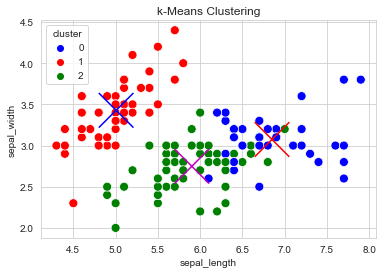

In [87]:
#พล็อตดูกลุ่มข้อมูลและจุดศูนย์กลางแต่ละกลุ่มที่ modelจัดให้

   
color_dict = dict({0:'blue',               #เก็บค่าสีสำหรับการพล็อตจุด
                  1:'red',
                  2: 'g'})

centroid_colors=['r','b','m']              #สีเครื่องหมาย x
sns.scatterplot('sepal_length','sepal_width',data=df,hue='cluster', palette=color_dict, s=80)
plt.scatter(x_centroids, y_centroids,s=1200, marker='x', c=centroid_colors)
plt.title('k-Means Clustering')
plt.show()

In [88]:
print(model.predict(X_input))

[1 2]


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


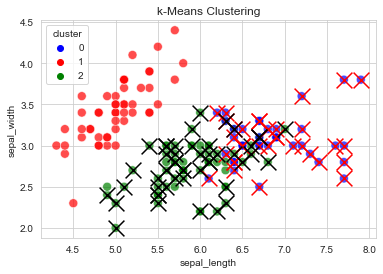

In [89]:
#ต้องการดูจุดที่ระบบจัดกลุ่มผิดไปจากของจริง
#ลงเครื่องหมาย x จุดที่ predict จัดกลุ่มผิด
w1 = df[(df.cluster==0) & (df.species!='versicolor')] #.count()
w2 = df[(df.cluster==2) & (df.species!='virginica')] #.count()

color_dict = dict({0:'blue',
                  1:'red',
                  2: 'g'})


sns.scatterplot('sepal_length','sepal_width',data=df,hue='cluster', palette=color_dict, s=80, alpha=0.7)

plt.scatter(w1.sepal_length, w1.sepal_width, marker='x',s=250,c='red')
plt.scatter(w2.sepal_length, w2.sepal_width, marker='x',s=250,c='black')
plt.title('k-Means Clustering')
plt.savefig('kmean-clustering-wrong',dpi=120)
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


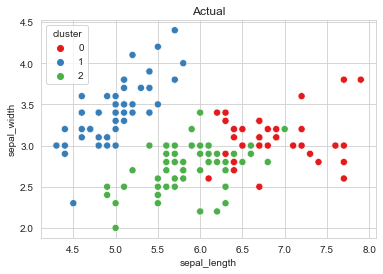

In [91]:
#เฉลยของจริง
sns.scatterplot('sepal_length','sepal_width',data=df,hue='cluster', palette='Set1', s=50)
plt.title('Actual')
plt.show()

In [92]:
#ทำนายการซื้อสินค้าด้วย Logistic Regression

import numpy as np
import matplotlib.pyplot as plt

In [93]:
#x = features(ราคา), y = label(ผลการตัดสินใจ)
x = np.array([120,150,170,200,200,200,204,204,205,215,250,270,300,305])
y = np.array([1,1,1,1,1,0,0,1,1,0,0,0,0,0])  #1 คือซื้อ 0 คือไม่ซื้อ

In [94]:
#ดูข้อมูลด้วย for

for i, val in enumerate(y[0:11]):
    print(' {}  -> {}'.format(x[i], val))

 120  -> 1
 150  -> 1
 170  -> 1
 200  -> 1
 200  -> 1
 200  -> 0
 204  -> 0
 204  -> 1
 205  -> 1
 215  -> 0
 250  -> 0


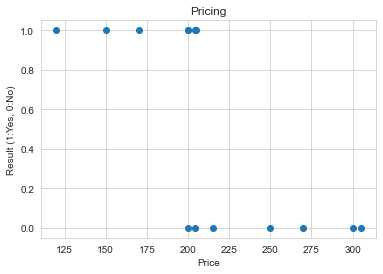

In [95]:
#กราฟข้อมูล
plt.scatter(x, y)
plt.title("Pricing")
plt.xlabel('Price')
plt.ylabel('Result (1:Yes, 0:No)')
plt.show()

In [96]:
#สร้าง Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model

LogisticRegression()

In [97]:
#เปลี่ยน x จาก vector ให้เป็น matrix
X = x.reshape(-1,1)
X[:5]

array([[120],
       [150],
       [170],
       [200],
       [200]])

In [98]:
model.fit(X, y)

LogisticRegression()

In [99]:
#ทำนาย
X_input = [[198],[200],[204],[205],[206],[207],[210]]
y_predict = model.predict(X_input)
y_predict

array([1, 1, 1, 1, 0, 0, 0])

In [100]:
#เขียนฟังก์ชันให้ดูผลลัพธ์ง่ายขึ้น
print('Price | Pred')
print('--------------')
for i, val in enumerate(y_predict):
    print('{:5.1f} |   {}'.format(X_input[i][0], val))

Price | Pred
--------------
198.0 |   1
200.0 |   1
204.0 |   1
205.0 |   1
206.0 |   0
207.0 |   0
210.0 |   0


In [101]:
#Probability ความน่าจะเป็นของ output 
y_pred_prob = model.predict_proba(X_input)
y_pred_prob

array([[0.19416994, 0.80583006],
       [0.26164067, 0.73835933],
       [0.43386545, 0.56613455],
       [0.48169393, 0.51830607],
       [0.52986024, 0.47013976],
       [0.57747672, 0.42252328],
       [0.70908504, 0.29091496]])

In [102]:
#ฟังก์ชันความน่าจะเป็น
print('Price | Pred | Prob(Y)')
print('--------------')
for i, val in enumerate(y_pred_prob):
    print('{:5.1f} | {:4} | {:.3f}'.format(X_input[i][0], y_predict[i], val[1]))

#ตัวอย่างเช่น ถ้าตั้งราคา 205฿ ความน่าจะเป็นที่ลูกค้าซื้อเท่ากับ  0.518 (โอกาสสูงที่จะไม่ซื้อ)

Price | Pred | Prob(Y)
--------------
198.0 |    1 | 0.806
200.0 |    1 | 0.738
204.0 |    1 | 0.566
205.0 |    1 | 0.518
206.0 |    0 | 0.470
207.0 |    0 | 0.423
210.0 |    0 | 0.291


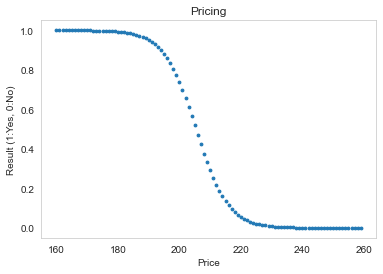

In [103]:
#พล็อตกราฟ ทำดังนี้
prices = np.arange(160, 260, 1.0/1)
prob = []
for i in prices:
    p_loss, p_win = model.predict_proba([[i]])[0]
    prob.append(p_win) 
    
plt.scatter(prices, prob, s=8)
plt.title("Pricing")
plt.xlabel('Price')
plt.ylabel('Result (1:Yes, 0:No)')
plt.grid()
plt.show()    